In [1]:
# installation
!pip install numpy
!pip install scipy

You should consider upgrading via the 'D:\Users\h50022848.CHINA\Github\regression\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\Users\h50022848.CHINA\Github\regression\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [12]:
# importing
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# const
K = 1000 # the dimension of X
N = 50000 # the size of dataset
# create random dataset
X0_s = np.ones([N,1]) # the first column has all values equal to one for the coefficients of beta_0
X1_s = np.random.uniform(0,1,([N,K]))
X = np.concatenate([X0_s, X1_s],axis=1)
beta = np.random.randint(0,5,size=K+1)
## Values for the normal errors

error_s = np.random.normal(0,1,N)

## Values for the y's

Y = np.dot(X,beta) + error_s
rho = 5

# a)
Estimate the value of the regression coefficients by implementing the analytical
solution. Use this solution as a benchmark for the following sections.

In order to solve the following objective function,
\begin{align*}
  \text{minimize}_\beta \quad & \|y-X\beta\|^2_2 + \rho \| \beta \|_2
\end{align*}
we can derive its analytical solution $\beta_{ls}=(X^T X + \rho)^{-1}X^T y$


In [3]:
from numpy.linalg import inv
beta_ridge_exact = inv(X.T @ X + rho * np.identity(K+1)) @ X.T @ Y

# b)
Estimate the value of the regression coefficients by using the function minimize from the Python module Scipy.optimize. Try at least four available solvers and compare their performance in terms of number of iterations, number of function, gradient and hessian evaluations as well as total computational time.

In [4]:
from scipy.optimize import minimize
from scipy.optimize import Bounds
import time

def rigid_reg(beta_ls, X, Y, rho):
    z = Y - X @ beta_ls
    return np.dot(z,z) + rho * np.dot(beta_ls, beta_ls)

### L-BFGS-B Method

In [169]:
beta0 = np.zeros(K+1)
start_time = time.process_time()
res = minimize(rigid_reg, beta0, args=(X, Y, rho),  method='L-BFGS-B', options={'disp': True, 'maxiter': 200})
end_time = time.process_time()
print('Training time: %f s' %(end_time - start_time))
print(res)
err_val_1 = np.linalg.norm(beta_ridge_exact.T-res.x,ord=2)/np.linalg.norm(beta_ridge_exact.T,ord=2)
print('\nError in values of coefficients = %8.4f' %err_val_1)

Training time: 1840.968750 s
      fun: 226867.33810809962
 hess_inv: <1001x1001 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -879.40716719,  2929.82151184,  -169.60839378, ...,
       -4037.22808822, -1136.35614961, -1343.71221882])
  message: 'STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT'
     nfev: 15030
      nit: 10
     njev: 15
   status: 1
  success: False
        x: array([ 4.02989095,  3.42486297,  2.02489355, ...,  3.57165902,
       -0.04047266,  1.89499572])

Error in values of coefficients =   0.0790


### Scalar function of one or more variables using Sequential Least Squares Programming (SLSQP)

In [165]:
beta0 = np.zeros(K+1)
start_time = time.process_time()
res = minimize(rigid_reg, beta0, args=(X, Y, rho),  method='SLSQP', options={'disp': True, 'maxiter': 200})
end_time = time.process_time()
print('Training time: %f s' %(end_time - start_time))
print('(This is a processing time which can be larger than actually wall time when using multiple cores)')
print(res)
err_val_1 = np.linalg.norm(beta_ridge_exact.T-res.x,ord=2)/np.linalg.norm(beta_ridge_exact.T,ord=2)
print('\nError in values of coefficients = %8.4f' %err_val_1)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 79909.94277963352
            Iterations: 19
            Function evaluations: 19115
            Gradient evaluations: 19
Training time: 2267.531250 s
(This is a processing time which can be larger than actually wall time when using multiple cores)
     fun: 79909.94277963352
     jac: array([-0.02539062, -0.00585938,  0.        , ..., -0.00390625,
       -0.00976562, -0.00488281])
 message: 'Optimization terminated successfully'
    nfev: 19115
     nit: 19
    njev: 19
  status: 0
 success: True
       x: array([3.30480790e+00, 2.97867246e+00, 2.00284443e+00, ...,
       3.99113048e+00, 1.98953810e-03, 1.98778346e+00])

Error in values of coefficients =   0.0000


### Nelder-Mead algorithm

In [172]:
beta0 = np.zeros(K+1)
start_time = time.process_time()
res = minimize(rigid_reg, beta0, args=(X, Y, rho),  method='Nelder-Mead', options={'disp': True,'maxiter': 2000})
end_time = time.process_time()
print('Training time: %f s' %(end_time - start_time))
print('(This is a processing time which can be larger than actually wall time when using multiple cores)')
print(res)
err_val_1 = np.linalg.norm(beta_ridge_exact.T-res.x,ord=2)/np.linalg.norm(beta_ridge_exact.T,ord=2)
print('\nError in values of coefficients = %8.4f' %err_val_1)

Training time: 132.406250 s
(This is a processing time which can be larger than actually wall time when using multiple cores)
 final_simplex: (array([[7.49250749e-07, 7.49250749e-07, 7.49250749e-07, ...,
        7.49250749e-07, 7.49250749e-07, 7.49250749e-07],
       [2.50000000e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.00997504e-07, 5.00997504e-07, 5.00997504e-07, ...,
        5.00997504e-07, 5.00997504e-07, 5.00997504e-07],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]), array([5.14426272e+10, 5.14426399e+10, 5.14426524e+10, ...,
       5.14426526e+10, 5.14426526e+10, 5.14426526e+10]))
           fun: 51

### Constrained Optimization BY Linear Approximation

In [ ]:
beta0 = np.zeros(K+1)
start_time = time.process_time()
res = minimize(rigid_reg, beta0, args=(X, Y, rho),  method='COBYLA', options={'disp': True, 'maxiter': 2000})
end_time = time.process_time()
print('Training time: %f s' %(end_time - start_time))
print('(This is a processing time which can be larger than actually wall time when using multiple cores)')
print(res)
err_val_1 = np.linalg.norm(beta_ridge_exact.T-res.x,ord=2)/np.linalg.norm(beta_ridge_exact.T,ord=2)
print('\nError in values of coefficients = %8.4f' %err_val_1)

As we can see from the result, the method SLSQP has the best performance. It converges in 19 iterations and the beta error is almost 0.

The method L-BFGS-B stops because of it limits the maximum evaluation numbers. The final beta error is 0.0790.

In order to shorten the training time of COBYLA, Nelder-Mead, we set the maximum iteration as 2000. The final beta errors are . The training times are

# c)
Modify the preceding optimization model by adding (lower and upper) bounds on the values of the $\beta$ coefficients. Solve it again with the module Scipy.optimize a by using at least two different solvers, which should accpet the introduction of bounds on the variabels. Compare these methods and briefly comments on possible interpretations of the values of the coefficients.

### L-BFGS-B with bounds

In [96]:
# with bounds
beta0 = np.zeros(K+1)
bounds = (())
# for i in range(K+1):
#     bounds = bounds + ((0.0, 5.0),)
start_time = time.process_time()
res = minimize(rigid_reg, beta0, args=(X, Y, rho),  method='L-BFGS-B', bounds = Bounds(lb = 0.0, ub= 5.0 ), options={'disp': True})
end_time = time.process_time()
print('Elapsed time: %8.5f' %(end_time - start_time))
print('(This is a processing time which can be larger than actually wall time when using multiple cores)')

err_val_1 = np.linalg.norm(beta_ridge_exact.T-res.x,ord=2)/np.linalg.norm(beta_ridge_exact.T,ord=2)
print('\nError in values of coefficients = %8.4f' %err_val_1)

Training time: 7.442934 s

Values of the least squares coefficients obtained with Nelder-Mead:
beta   0   1.962
beta   1   0.000
beta   2   3.001
beta   3   0.000
beta   4   3.976
beta   5   1.989
beta   6   0.000
beta   7   4.010
beta   8   1.989
beta   9   2.990
beta  10   0.000
beta  11   2.047
beta  12   0.000
beta  13   2.003
beta  14   0.983
beta  15   0.998
beta  16   1.023
beta  17   1.970
beta  18   2.027
beta  19   3.995
beta  20   3.010
beta  21   2.011
beta  22   3.990
beta  23   2.991
beta  24   3.997
beta  25   2.004
beta  26   1.013
beta  27   2.007
beta  28   3.999
beta  29   0.000
beta  30   0.980
beta  31   2.000
beta  32   3.003
beta  33   0.995
beta  34   1.986
beta  35   1.018
beta  36   3.993
beta  37   4.024
beta  38   0.001
beta  39   3.002
beta  40   1.991
beta  41   0.976
beta  42   0.000
beta  43   4.007
beta  44   4.018
beta  45   1.004
beta  46   2.960
beta  47   3.997
beta  48   1.019
beta  49   1.995
beta  50   1.020
beta  51   4.019
beta  52   0.019
beta

# d)
Estimate the value of the regression coefficients of (1) by implementing the: *
1. Coordinate descent Method
2. Newton method
3. Quasi-Newton method

## i. Gradient Decent

In [7]:
# Definition of the OF
def ridge_reg(beta_ridge, X, Y):
    # beta_ridge has the dimension of (K+1,)
    # X has the dimension of (N, K+1)
    # Y has the dimenstion of (N, )
    z = Y - X @ beta_ridge
    return np.dot(z.T,z) + rho * np.dot(beta_ridge.T, beta_ridge)

# Definition of the gradient

def ridge_reg_der(beta_ridge,X,Y):
    # beta_ridge has the dimension of (K+1,)
    # X has the dimension of (N, K+1)
    # Y has the dimenstion of (N, )

    pp = -2*np.dot((Y - X @ beta_ridge).T,X)
    aa = pp.squeeze() + 2 * rho * beta_ridge
    return aa

# Definition of the hessian matrix

def ridge_reg_hess(beta_ls,X,Y):
    # beta_ridge has the dimension of (K+1,)
    # X has the dimension of (N, K+1)
    # Y has the dimenstion of (N, )
    ss = 2*np.dot(X.T,X) + 2 * rho
    return ss

In [161]:
# Implementation of the gradient method

(a,b) = X.shape

## Parameters for the algorithm
sigma = 0.3
alpha = 1e-6
delta = 0.5
n_iter = 1000 # Maximum number of iterations
epsilon = 1e-5
tol = 10000

## Initial values for the variables and data containers

beta_ridge = np.zeros(b) # initial value for beta

OF_iter = np.zeros(n_iter)
tol_iter = np.zeros(n_iter)
alpha_iter = np.zeros(n_iter)

# Implement the gradient method

time_start = time.process_time()

i = 0

while (i <= n_iter-2) and (tol > epsilon):
    i = i + 1
    grad = ridge_reg_der(beta_ridge,X,Y) # Gradient vector
    ddirect = -grad # Descent direction
##### Armijo rule to adjust alpha ######
    alpha=1e-5
    while rigid_reg(beta_ridge + alpha * ddirect, X, Y, rho) > rigid_reg(beta_ridge, X, Y, rho)+alpha*sigma*np.dot(ddirect, grad):
        alpha = alpha*delta
#########################################
    beta_ridge = beta_ridge + alpha*ddirect

    OF_iter[i] = rigid_reg(beta_ridge, X, Y, rho)
    tol = np.linalg.norm(grad,ord=2)
    tol_iter[i] = tol
    alpha_iter[i] = alpha

time_elapsed = (time.process_time() - time_start)

## Print the results

print('Elapsed time = %8.5f' %(time_elapsed))
print('(This is a processing time which can be larger than actually wall time when using multiple cores)')
print('\nNumber of iterations = %5.0f' %i)
print('Objective function   = %11.5f' %OF_iter[i])
print('Optimality tolerance = %11.5f' %tol)

beta_err = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge,ord=2)
print('\nBeta coefficient error = %10.5f' %beta_err)

Elapsed time = 2603.45312
(This is a processing time which can be larger than actually wall time when using multiple cores)

Number of iterations =   999
Objective function   = 79919.50375
Optimality tolerance =    28.56762

Beta coefficient error =    0.00866


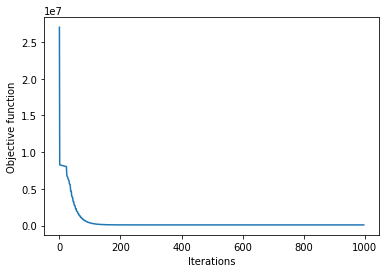

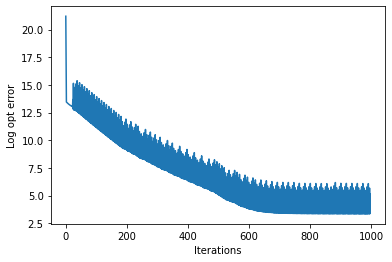

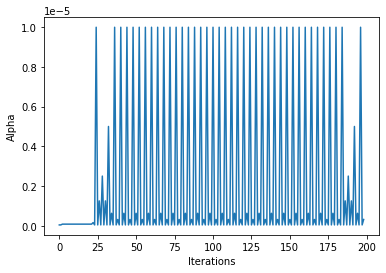

In [162]:
# Plot results showing the evolution of the algorithm
%matplotlib inline
plt.plot(OF_iter[1:i]),plt.ylabel('Objective function'),plt.xlabel('Iterations')
plt.show()

plt.plot(np.log(tol_iter[1:i])),plt.ylabel('Log opt error'),plt.xlabel('Iterations')
plt.show()

plt.plot(alpha_iter[1:200]),plt.ylabel('Alpha'),plt.xlabel('Iterations')
plt.show()

## ii. Newton's method

In [9]:

# Implementation of Newton's method

(a,b) = X.shape

## Parameters for the algorithm

alpha = 1e-4
n_iter = 200 # Maximum number of iterations
epsilon = 1e-5
tol = 10000
sigma = 0.1
delta = 0.1

## Initial values for the variables and data containers

beta_lsn = np.zeros(b) # initial value for beta

OF_iter = np.zeros(n_iter)
tol_iter = np.zeros(n_iter)
alpha_iter = np.zeros(n_iter)

# Implement Newton's method

time_start = time.process_time()

i = 0

while (i <= n_iter-2) and (tol > epsilon):
    i = i + 1
    grad = ridge_reg_der(beta_lsn,X,Y)
    hess = ridge_reg_hess(beta_lsn,X,Y)
    ddirect = -np.dot(np.linalg.inv(hess),grad) # Descent direction
##### Armijo rule to adjust alpha ######
#########################################
    beta_lsn = beta_lsn + ddirect
    OF_iter[i] = rigid_reg(beta_lsn, X, Y, rho)
    tol = np.linalg.norm(grad,ord=2)
    tol_iter[i] = tol
    alpha_iter[i] = alpha

time_elapsed = (time.process_time() - time_start)

## Print the results

print('Elapsed time = %8.5f' %(time_elapsed))
print('(This is a processing time which can be larger than actually wall time when using multiple cores)')
print('\nNumber of iterations = %5.0f' %i)
print('Objective function   = %11.5f' %OF_iter[i])
print('Optimality tolerance = %11.5f' %tol)

beta_err = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_lsn,ord=2)/np.linalg.norm(beta_lsn,ord=2)
print('\nBeta coefficient error = %10.5f' %beta_err)

Elapsed time = 36.00000
(This is a processing time which can be larger than actually wall time when using multiple cores)

Number of iterations =     8
Objective function   = 79909.94278
Optimality tolerance =     0.00000

Beta coefficient error =    0.00000


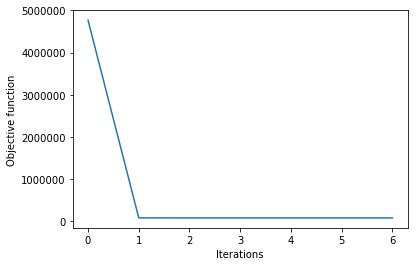

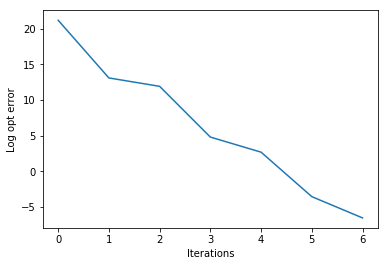

In [18]:
# Plot results showing the evolution of the algorithm

plt.plot(OF_iter[1:i]),plt.ylabel('Objective function'),plt.xlabel('Iterations')
plt.show()

plt.plot(np.log(tol_iter[1:i])),plt.ylabel('Log opt error'),plt.xlabel('Iterations')
plt.show()

## iii. Quasi-Newton Method

In [63]:
# Quasi-Newton

(a,b) = X.shape

## Parameters for the algorithm
sigma_1 = 0.001
sigma_2 = 0.9
alpha = 1e-6
delta = 0.5
n_iter = 500 # Maximum number of iterations
epsilon = 1e-3
tol = 10000

## Initial values for the variables and data containers

beta_ridge = np.zeros(b) # initial value for beta

OF_iter = np.zeros(n_iter)
tol_iter = np.zeros(n_iter)
alpha_iter = np.zeros(n_iter)

# Implement the quasi-newton method
H = np.identity(K+1)

time_start = time.process_time()

i = 0

while (i <= n_iter-2) and (tol > epsilon):
    i = i + 1
    grad = ridge_reg_der(beta_ridge,X,Y) # Gradient vector
    ddirect = -grad # Descent direction
    p = H @ ddirect
    alpha=1e-4
    # in order to satisfy Wolfe condition
    while rigid_reg(beta_ridge + alpha * p, X, Y, rho) > rigid_reg(beta_ridge, X, Y, rho)+alpha*sigma_1*np.dot(ddirect.T, p):
        alpha = alpha*delta
    beta_ridge_old = beta_ridge
    beta_ridge = beta_ridge + alpha * H @ ddirect
    s = (alpha * H @ ddirect).reshape(-1,1)
    v = (ridge_reg_der(beta_ridge, X ,Y) - ridge_reg_der(beta_ridge_old, X, Y)).reshape(-1,1)
    H = (np.eye(K+1) - (v @ s.T) / (v.T @ s)).T @ H @ (np.eye(K+1) - (v @ s.T) / (v.T @ s)) + (s @ s.T) / (v.T @ s)
    OF_iter[i] = rigid_reg(beta_ridge, X, Y, rho)
    tol = np.linalg.norm(grad,ord=2)
    tol_iter[i] = tol
    alpha_iter[i] = alpha
    if i % 100 == 0:
        print('Iteration %d: Loss = %f' %(i, OF_iter[i]))

time_elapsed = (time.process_time() - time_start)

## Print the results

print('Elapsed time = %8.5f' %(time_elapsed))
print('(This is a processing time which can be larger than actually wall time when using multiple cores)')
print('\nNumber of iterations = %5.0f' %i)
print('Objective function   = %11.5f' %OF_iter[i])
print('Optimality tolerance = %11.5f' %tol)

beta_err = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge,ord=2)
print('\nBeta coefficient error = %10.5f' %beta_err)

Iteration 100: Loss = 2858356.239302
Iteration 200: Loss = 82582.053765
Iteration 300: Loss = 79913.246141
Iteration 400: Loss = 79909.946217
Elapsed time = 829.67188
(This is a processing time which can be larger than actually wall time when using multiple cores)

Number of iterations =   499
Objective function   = 79909.94278
Optimality tolerance =     0.79563

Beta coefficient error =    0.00000


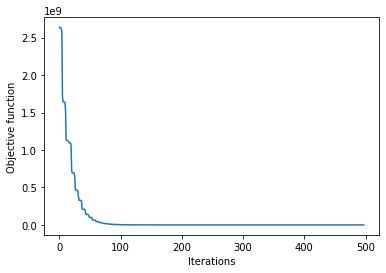

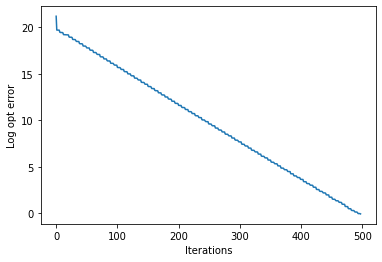

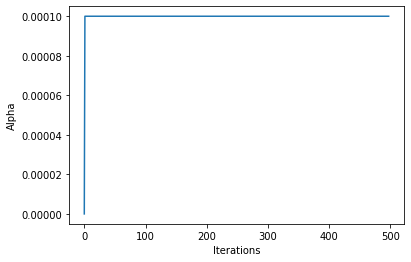

In [13]:
# Plot results showing the evolution of the algorithm

plt.plot(OF_iter[1:i]),plt.ylabel('Objective function'),plt.xlabel('Iterations')
plt.show()

plt.plot(np.log(tol_iter[1:i])),plt.ylabel('Log opt error'),plt.xlabel('Iterations')
plt.show()

plt.plot(alpha_iter[1:i]),plt.ylabel('Alpha'),plt.xlabel('Iterations')
plt.show()

From the performance of each algorithm, we can clearly see that newton method has the best performance. After 8 iterations, the beta_error becomes zero. It has the shortest training time plus the least iteration number.

Quasi-Newtion also has impressive performance. After 500 iterations, the beta error also becomes zero. Because of higher iteration number, it takes more training time compared to Newton Method.

Gradient Decent costs more times and need more iterations for convergence. The beta error is also low after 1000 iterations.



# e)
Estimate the value of the regression coefficients of (1) by implementing the *
1. Coordinate descent Method
2. Stochastic gradient Method
3. Three other techniques presentaed in Topic 2

## i.Coordinate descent Method

In [108]:
#Descenso por coordenadas
import time
(a, b) = X.shape

def rigid_reg_der_k(beta_ridge,k, X, Y):
    # beta_ridge has the dimension of (K+1,)
    # X has the dimension of (N, K+1)
    # Y has the dimenstion of (N, )

    pp = -2*np.dot((Y - X @ beta_ridge).T,X[:, k])
    aa = pp.squeeze() + 2 * rho * beta_ridge[k]
    return aa

niter = 30000
epsilon = 1e-9
i = 0
alpha = 1e-4
delta = 0.1
sigma = 0.1
OF_iter_cur = 0
tol_iter = np.zeros(niter)
error_coord_iter = []
tol = 10
beta_coord = np.zeros(b)

time_start = time.time()

while (i < niter) and (tol > epsilon):
    k = np.random.randint(b)
    grad_k = rigid_reg_der_k(beta_coord,k,X,Y)
    grad = np.zeros(b)
    grad[k] = grad_k
    ddirect = -grad
    ##### Armijo rule to adjust alpha ######
    alpha=1e-8
    while rigid_reg(beta_coord + alpha * ddirect, X, Y, rho) > rigid_reg(beta_coord, X, Y, rho)+alpha*sigma*np.dot(ddirect, grad):
        alpha = alpha*delta
    #########################################
    beta_coord = beta_coord + alpha*ddirect
    tol = np.linalg.norm(grad, ord = 2)
    tol_iter[i] = tol
    error_coord_iter.append(np.linalg.norm(np.transpose(beta_ridge_exact) - beta_coord.T, ord = 2)/np.linalg.norm(beta_ridge_exact, ord = 2))
    if i % 100 == 0:
        print('Iteration %d: Beta_err = %f' %(i, error_coord_iter[i]))
    i +=1


time_elapsed = (time.time() - time_start)
print('time elapsed =',time_elapsed)
print('number iterations =',i)
print('tolerance=',tol)
print('error', np.linalg.norm(np.transpose(beta_ridge_exact) - beta_coord.T, ord = 2)/np.linalg.norm(beta_ridge_exact, ord = 2))

Iteration 0: Beta_err = 1.000019
Iteration 100: Beta_err = 0.985894
Iteration 200: Beta_err = 0.972007
Iteration 300: Beta_err = 0.957839
Iteration 400: Beta_err = 0.943494
Iteration 500: Beta_err = 0.934305
Iteration 600: Beta_err = 0.921877
Iteration 700: Beta_err = 0.910970
Iteration 800: Beta_err = 0.897887
Iteration 900: Beta_err = 0.888280
Iteration 1000: Beta_err = 0.877583
Iteration 1100: Beta_err = 0.865085
Iteration 1200: Beta_err = 0.856211
Iteration 1300: Beta_err = 0.846461
Iteration 1400: Beta_err = 0.835064
Iteration 1500: Beta_err = 0.825178
Iteration 1600: Beta_err = 0.817503
Iteration 1700: Beta_err = 0.809460
Iteration 1800: Beta_err = 0.800945
Iteration 1900: Beta_err = 0.793241
Iteration 2000: Beta_err = 0.785933
Iteration 2100: Beta_err = 0.778949
Iteration 2200: Beta_err = 0.772701
Iteration 2300: Beta_err = 0.766078
Iteration 2400: Beta_err = 0.759480
Iteration 2500: Beta_err = 0.754513
Iteration 2600: Beta_err = 0.748642
Iteration 2700: Beta_err = 0.743115
Iter

KeyboardInterrupt: 

## ii. Stochastic gradient

In [110]:
def rigid_reg_stoc(beta_ridge, X, Y, subset):
    Xsub = X[subset,:]
    Ysub = Y[subset]
    z = Ysub - Xsub @ beta_ridge
    return np.dot(z.T,z) + rho * np.dot(beta_ridge.T, beta_ridge)

def ridge_reg_der_stoc(beta_ridge,X,Y,subset):
    Xsub = X[subset,:]
    Ysub = Y[subset]

    pp = -2*np.dot((Ysub - Xsub @ beta_ridge).T,Xsub)
    aa = pp.squeeze() + 2 * rho * beta_ridge
    return aa
(a,b)=X.shape
beta_ridge=np.zeros(b) #initial value for beta
alpha=1e-6
n_iter=200000 #maximim number iteration
OF_iter_cur= 0
OF_iter_pre = 0
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
error_minib_iter=np.zeros(n_iter)
i=0
sigma = 0.001
#### Number of samples to take into consideration in each iteration
subsetsize = 128


time_start = time.time()

while i <= n_iter-2:
    subset = np.random.choice(N, subsetsize, replace=False)
    grad = ridge_reg_der_stoc(beta_ridge, X, Y, subset)
    ddirect = -grad
    ##### Armijo rule to adjust alpha ######
    alpha=1e-6
    while rigid_reg_stoc(beta_ridge + alpha * ddirect, X, Y, subset) > rigid_reg_stoc(beta_ridge, X, Y,subset)+alpha*sigma*np.dot(ddirect, grad):
        alpha = alpha*delta
    #########################################
    beta_ridge = beta_ridge + alpha * ddirect
    OF_iter_cur = rigid_reg_stoc(beta_ridge, X, Y, subset)
    error_minib_iter[i] = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge,ord=2)
    if i % 1000 == 0:
        print('Iteration %d: Loss = %f Beta_err = %f' %(i, OF_iter_cur, error_minib_iter[i]))
    i=i+1

time_elapsed = (time.time() - time_start)
print('time elapsed =',time_elapsed)
print('iterations =',i)
print('Objective Function value =', OF_iter_cur)
print('Betas =',beta_ridge)
print('error=',np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge,ord=2))

Iteration 0: Loss = 115140188.202504 Beta_err = 18.098719
Iteration 1000: Loss = 39923.367123 Beta_err = 0.676170
Iteration 2000: Loss = 41907.533421 Beta_err = 0.661952
Iteration 3000: Loss = 35874.541711 Beta_err = 0.647751
Iteration 4000: Loss = 36515.313695 Beta_err = 0.634222
Iteration 5000: Loss = 34543.937684 Beta_err = 0.621016
Iteration 6000: Loss = 33681.385359 Beta_err = 0.608235
Iteration 7000: Loss = 35443.893122 Beta_err = 0.595503
Iteration 8000: Loss = 34925.923259 Beta_err = 0.583337
Iteration 9000: Loss = 36870.660388 Beta_err = 0.571441
Iteration 10000: Loss = 37004.994872 Beta_err = 0.559774
Iteration 11000: Loss = 35150.943279 Beta_err = 0.548614
Iteration 12000: Loss = 31751.038844 Beta_err = 0.537620
Iteration 13000: Loss = 31726.865778 Beta_err = 0.526989
Iteration 14000: Loss = 31862.973371 Beta_err = 0.516702
Iteration 15000: Loss = 33311.998639 Beta_err = 0.506662
Iteration 16000: Loss = 29827.878610 Beta_err = 0.497072
Iteration 17000: Loss = 30208.929540 Be

## iii. Others Techniques
We will use the techniques presented in Topic 2 (one from each category: noise reduction, second-order, others)

### Noise Reduction
We want to implement Dynamic Sample Size Method.
The key points of this method is to gradually increase the minibatch size.


In [113]:

def rigid_reg_stoc(beta_ridge, X, Y, subset):
    Xsub = X[subset,:]
    Ysub = Y[subset]
    z = Ysub - Xsub @ beta_ridge
    return np.dot(z.T,z) + rho * np.dot(beta_ridge.T, beta_ridge)

def ridge_reg_der_stoc(beta_ridge,X,Y,subset):
    Xsub = X[subset,:]
    Ysub = Y[subset]

    pp = -2*np.dot((Ysub - Xsub @ beta_ridge).T,Xsub)
    aa = pp.squeeze() + 2 * rho * beta_ridge
    return aa

(a,b)=X.shape
beta_ridge=np.zeros(b) #initial value for beta
n_iter=50000 #maximim number iteration
OF_iter_cur = 0
alpha_iter=np.zeros(n_iter)
error_minib_iter=np.zeros(n_iter)
i=0
epsilon=1e-6
delta = 0.2
tau = 1.0001
subsetsize = 1


time_start = time.process_time()

while i <= n_iter-2:
    #### Number of samples to take into consideration in each iteration

    subsetsize_trunc = min(int(subsetsize),a)
    subset = np.random.choice(N, subsetsize_trunc, replace=False)
    grad = ridge_reg_der_stoc(beta_ridge, X, Y, subset)
    ddirect = -grad
    ##### Armijo rule to adjust alpha ######
    alpha=1e-4
    while rigid_reg_stoc(beta_ridge + alpha * ddirect, X, Y, subset) > rigid_reg_stoc(beta_ridge, X, Y,subset)+alpha*sigma*np.dot(ddirect, grad):
        alpha = alpha*delta
    #########################################
    beta_ridge = beta_ridge + alpha * ddirect
    OF_iter_cur = rigid_reg_stoc(beta_ridge, X, Y, subset)
    error_minib_iter[i] = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge,ord=2)
    if i % 100 == 0:
        print('Iteration %d: Loss = %f, minibatch_size = %d Beta_error = %f' %(i, OF_iter_cur, subsetsize_trunc, error_minib_iter[i]))
    i=i+1
    subsetsize *= tau

time_elapsed = (time.process_time()- time_start)
print('time elapsed =',time_elapsed)
print('iterations =',i)
print('Objective Function value =', OF_iter_cur)
print('Betas =',beta_ridge)
print('error=',np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge,ord=2))

Iteration 0: Loss = 872379.507737, minibatch_size = 1 Beta_error = 20.546819
Iteration 100: Loss = 20110.190197, minibatch_size = 1 Beta_error = 0.710460
Iteration 200: Loss = 19782.213506, minibatch_size = 1 Beta_error = 0.706440
Iteration 300: Loss = 19744.517177, minibatch_size = 1 Beta_error = 0.705061
Iteration 400: Loss = 20499.177984, minibatch_size = 1 Beta_error = 0.704672
Iteration 500: Loss = 20172.595805, minibatch_size = 1 Beta_error = 0.700580
Iteration 600: Loss = 20668.540503, minibatch_size = 1 Beta_error = 0.701702
Iteration 700: Loss = 19701.237117, minibatch_size = 1 Beta_error = 0.700971
Iteration 800: Loss = 20384.133832, minibatch_size = 1 Beta_error = 0.697472
Iteration 900: Loss = 22758.284790, minibatch_size = 1 Beta_error = 0.698871
Iteration 1000: Loss = 20464.380312, minibatch_size = 1 Beta_error = 0.697329
Iteration 1100: Loss = 20047.812863, minibatch_size = 1 Beta_error = 0.697468
Iteration 1200: Loss = 21285.219465, minibatch_size = 1 Beta_error = 0.696

### Second Order Methods: Stochastic Quasi-Newton

In [114]:
# Stochastic-Quasi-Newton
def rigid_reg_stoc(beta_ridge, X, Y, subset):
    Xsub = X[subset,:]
    Ysub = Y[subset]
    z = Ysub - Xsub @ beta_ridge
    return np.dot(z.T,z) + rho * np.dot(beta_ridge.T, beta_ridge)

def ridge_reg_der_stoc(beta_ridge,X,Y,subset):
    Xsub = X[subset,:]
    Ysub = Y[subset]

    pp = -2*np.dot((Ysub - Xsub @ beta_ridge).T,Xsub)
    aa = pp.squeeze() + 2 * rho * beta_ridge
    return aa

(a,b) = X.shape

## Parameters for the algorithm
sigma_1 = 0.0001
sigma_2 = 0.9
alpha = 1e-6
delta = 0.1
n_iter = 20000 # Maximum number of iterations
epsilon = 1e-3
tol = 10000

## Initial values for the variables and data containers

beta_ridge = np.zeros(b) # initial value for beta

OF_iter = np.zeros(n_iter)
tol_iter = np.zeros(n_iter)
alpha_iter = np.zeros(n_iter)

# Implement the quasi-newton method
H = np.identity(K+1)

time_start = time.process_time()

i = 0
subsetsize = 512

while (i <= n_iter-2) and (tol > epsilon):
    i = i + 1
    subset = np.random.choice(N, subsetsize, replace=False)
    grad = ridge_reg_der_stoc(beta_ridge,X,Y, subset) # Gradient vector
    ddirect = -grad # Descent direction
    p = H @ ddirect
    alpha=2e-3
    # in order to satisfy Wolfe condition
    while rigid_reg_stoc(beta_ridge + alpha * p, X, Y, subset) > rigid_reg_stoc(beta_ridge, X, Y, subset)+alpha*sigma_1*np.dot(ddirect.T, p):
        alpha = alpha*delta
    beta_ridge_old = beta_ridge
    beta_ridge = beta_ridge + alpha * H @ ddirect
    s = (alpha * H @ ddirect).reshape(-1,1)
    v = (ridge_reg_der_stoc(beta_ridge, X ,Y, subset) - ridge_reg_der_stoc(beta_ridge_old, X, Y, subset)).reshape(-1,1)
    H = (np.eye(K+1) - (v @ s.T) / (v.T @ s)).T @ H @ (np.eye(K+1) - (v @ s.T) / (v.T @ s)) + (s @ s.T) / (v.T @ s)
    OF_iter[i] = rigid_reg_stoc(beta_ridge, X, Y, subset)
    tol = np.linalg.norm(grad,ord=2)
    tol_iter[i] = tol
    alpha_iter[i] = alpha
    beta_err = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge,ord=2)
    if i % 100 == 0:
        print('Iteration %d: Loss = %f, Beta_err = %f' %(i, OF_iter[i], beta_err))

time_elapsed = (time.process_time() - time_start)

## Print the results

print('Elapsed time = %8.5f' %(time_elapsed))
print('(This is a processing time which can be larger than actually wall time when using multiple cores)')
print('\nNumber of iterations = %5.0f' %i)
print('Objective function   = %11.5f' %OF_iter[i])
print('Optimality tolerance = %11.5f' %tol)

beta_err = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge,ord=2)
print('\nBeta coefficient error = %10.5f' %beta_err)

Iteration 100: Loss = 49565704.648714, Beta_err = 0.998667
Iteration 200: Loss = 29975411.621150, Beta_err = 0.997498
Iteration 300: Loss = 60591422.397373, Beta_err = 0.998881
Iteration 400: Loss = 45322163.529988, Beta_err = 0.996819
Iteration 500: Loss = 62218132.393429, Beta_err = 0.996984
Iteration 600: Loss = 49818761.168142, Beta_err = 0.997758
Iteration 700: Loss = 56915260.632719, Beta_err = 0.996850
Iteration 800: Loss = 59014457.488403, Beta_err = 0.997505
Iteration 900: Loss = 52518660.774061, Beta_err = 0.996472
Iteration 1000: Loss = 47137238.391903, Beta_err = 0.996714
Iteration 1100: Loss = 45728371.048252, Beta_err = 0.996591
Iteration 1200: Loss = 45181179.905992, Beta_err = 0.996472
Iteration 1300: Loss = 43528860.528578, Beta_err = 0.996110
Iteration 1400: Loss = 40142632.097464, Beta_err = 0.995392
Iteration 1500: Loss = 27682600.361192, Beta_err = 0.994124
Iteration 1600: Loss = 22008375.713792, Beta_err = 0.992371
Iteration 1700: Loss = 15824544.647203, Beta_err 

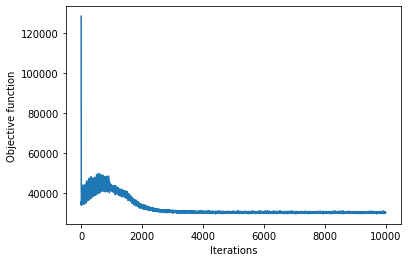

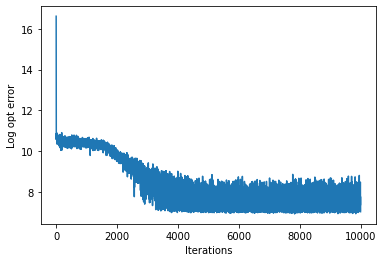

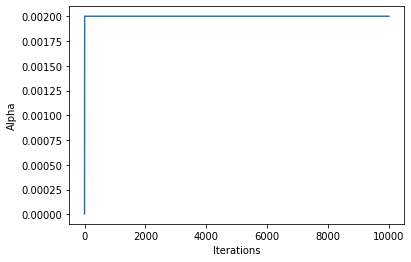

In [89]:
plt.plot(OF_iter[1:i]),plt.ylabel('Objective function'),plt.xlabel('Iterations')
plt.show()

plt.plot(np.log(tol_iter[1:i])),plt.ylabel('Log opt error'),plt.xlabel('Iterations')
plt.show()

plt.plot(alpha_iter[1:i]),plt.ylabel('Alpha'),plt.xlabel('Iterations')
plt.show()

### Others

In [120]:
# Momentum
def rigid_reg_stoc(beta_ridge, X, Y, subset):
    Xsub = X[subset,:]
    Ysub = Y[subset]
    z = Ysub - Xsub @ beta_ridge
    return np.dot(z.T,z) + rho * np.dot(beta_ridge.T, beta_ridge)

def ridge_reg_der_stoc(beta_ridge,X,Y,subset):
    Xsub = X[subset,:]
    Ysub = Y[subset]

    pp = -2*np.dot((Ysub - Xsub @ beta_ridge).T,Xsub)
    aa = pp.squeeze() + 2 * rho * beta_ridge
    return aa
(a,b)=X.shape
beta_ridge_cur=np.zeros(b) #initial value for beta
beta_ridge_pre=np.zeros(b)
alpha=1e-6
n_iter=15000 #maximim number iteration
OF_iter_cur= 0
OF_iter_pre = 0
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
error_minib_iter=np.zeros(n_iter)
i=0
sigma = 0.01
#### Number of samples to take into consideration in each iteration
subsetsize = 128
b = 0.1

time_start = time.time()

while i <= n_iter-2:
    subset = np.random.choice(N, subsetsize, replace=False)
    grad = ridge_reg_der_stoc(beta_ridge, X, Y, subset)
    ddirect = -grad
    ##### Armijo rule to adjust alpha ######
    alpha=1e-3
    while rigid_reg_stoc(beta_ridge_cur + alpha * ddirect, X, Y, subset) > rigid_reg_stoc(beta_ridge_cur, X, Y,subset)+alpha*sigma*np.dot(ddirect, grad):
        alpha = alpha*delta
    #########################################
    if i >= 2:
        tmp = beta_ridge_cur
        beta_ridge_cur = beta_ridge_cur + alpha * ddirect + b * (beta_ridge_cur - beta_ridge_pre)
        beta_ridge_pre = beta_ridge_cur
    else:
        tmp = beta_ridge_cur
        beta_ridge_cur = beta_ridge_cur + alpha * ddirect
        beta_ridge_pre = tmp
    OF_iter_cur = rigid_reg(beta_ridge_cur, X, Y, rho)
    error_minib_iter[i] = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge_cur,ord=2)
    if i % 1000 == 0:
        print('Iteration %d: Loss = %f Beta_err = %f' %(i, OF_iter_cur, error_minib_iter[i]))
    i=i+1

time_elapsed = (time.time() - time_start)
print('time elapsed =',time_elapsed)
print('iterations =',i)
print('Objective Function value =', OF_iter_cur)
print('Betas =',beta_ridge)
print('error=',np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge_cur,ord=2))

Iteration 0: Loss = 131983110.189495 Beta_err = 13.095260
Iteration 1000: Loss = 190148.853109 Beta_err = 0.073711


KeyboardInterrupt: 

### Conclusions
As we can see from the results, the Coordinate descent cannot successfully solve the task since it doesn't converge even after long training time.

The vanilla stochastic gradient has better performance compared to Coordinated descent. The Beta error rate compared to analytic solution of beta is around 0.2. This is the result after trying multiple Hyper-parameters.

We implemented one of the methods in categories noise reduction, second-order and momentum.
1. noise reduction:
We gradually increase the mini-batch size in order to get a faster convergence rate. The result shows that it does converge faster than vanilla stochastic gradient descent, and have smaller beta evaluation error.
2. second-order:
We chose stochastic quasi-newton method. We chose a larger batch size because second-order method is more sensitive to batch size compare to gradient method. If the batch size is chosen too small, it may not converge anymore. The result show that it does converge to a relative small beta evaluation error. However, it needs more iterations and causes more training time.
3. other:
We took momentum as our first choice. The result is much impressive. After around 10000 iterations, it converges to a very low beta error.

# f
To optimize the following problem,
\begin{align*}
  \text{minimize}_\beta \quad & \|y-X\beta\|^2_2 \\
  s.t. \sum_{i=1}^{K} \beta_i \leq 100
\end{align*}
we implemented some transformations first. We will get
\begin{align*}
  \text{minimize}_\beta \quad & \|y-X\beta\|^2_2 \\
  s.t. 100 - \sum_{i=1}^{K} \beta_i \geq 0
\end{align*}
After apply barrier algorithm, the above optimization problem can be approximately seen as the following unconstraint problem:
\begin{align*}
  \text{minimize}_\beta \quad & \|y-X\beta\|^2_2 - \mu log (100 - \sum_{i=1}^{K} \beta_i)\\
\end{align*}

In [159]:
mu = 100 # Hyper parameters
def reg(beta, X, Y):
    z = Y - X @ beta
    return np.dot(z.T,z) - mu * np.log(100 - np.sum(beta))


def reg_der(beta,X,Y):

    pp = -2*np.dot((Y - X @ beta).T,X)
    aa = pp.squeeze() + mu * beta / (100 - np.sum(beta))
    return aa

(a,b)=X.shape
beta_cur=np.zeros(b) #initial value for beta
beta_pre=np.zeros(b)
alpha=1e-8
n_iter=1000 #maximim number iteration
OF_iter_cur= 0
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
error_minib_iter=np.zeros(n_iter)
i=0
sigma = 0.01
#### Number of samples to take into consideration in each iteration
subsetsize = 128
b = 0.1

time_start = time.time()

while i <= n_iter-2:
    subset = np.random.choice(N, subsetsize, replace=False)
    grad = reg_der(beta_ridge, X, Y)
    ddirect = -grad
    alpha = 1e-7
    while np.sum(beta_cur + alpha * ddirect) >= 100:
        alpha = alpha * 0.5
    beta_cur = beta_cur + alpha * ddirect
    OF_iter_cur = reg(beta_cur, X, Y)
    # error_minib_iter[i] = np.linalg.norm(np.transpose(beta_ridge_exact)-beta_ridge,ord=2)/np.linalg.norm(beta_ridge_cur,ord=2)
    if i % 100 == 0:
        print('Iteration %d: Loss = %f' %(i, OF_iter_cur))
    i=i+1

time_elapsed = (time.time() - time_start)
print('time elapsed =',time_elapsed)
print('iterations =',i)
print('Objective Function value =', OF_iter_cur)
print('Betas =',beta_cur)
print('Sum of Beta =', np.sum(beta_cur))

Iteration 0: Loss = 51423704043.700287
Iteration 100: Loss = 49545234830.418068
Iteration 200: Loss = 47701716902.434242
Iteration 300: Loss = 46485180659.973824
Iteration 400: Loss = 46485180659.973824
Iteration 500: Loss = 46485180659.973824
Iteration 600: Loss = 46485180659.973824
Iteration 700: Loss = 46485180659.973824
Iteration 800: Loss = 46485180659.973824
Iteration 900: Loss = 46485180659.973824
time elapsed = 102.61144948005676
iterations = 999
Objective Function value = 46485180659.97382
Betas = [0.19851036 0.13861283 0.09929873 ... 0.16596024 0.02769263 0.09882866]
Sum of Beta = 99.99999999999997
